In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

%matplotlib inline
#mpl.style.use( 'ggplot' )
#plt.style.use('fivethirtyeight')
#sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [2]:
# load data
data=pd.read_csv("diamonds.csv")

data.shape

data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Features

Carat : Carat weight of the Diamond.  
Cut : Describe cut quality of the diamond.  
Quality in increasing order Fair, Good, Very Good, Premium, Ideal .  
Color : Color of the Diamond.  
With D being the best and J the worst.  
Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.  
(In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3  
Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.  
Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.  
Price : the Price of the Diamond.  
X : Length of the Diamond in mm.  
Y : Width of the Diamond in mm.  
Z : Height of the Diamond in mm.  
Qualitative Features (Categorical) : Cut, Color, Clarity.  ##cut is not a feature but a label (i think) 

Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.  

Verify if there are any null values, if so remove the lines with them

In [4]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Check if there are lines with impossible values

In [5]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The features x, y and z have a minimum of 0, which does not make sense

In [6]:
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Not that many lines, so we will remove them as they wont impact the models significantly

In [7]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]

In [8]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Delete "Unnamed 0" column as it does not have any use, since it only lists the index of each row, which pd does for us

In [9]:
del data['Unnamed: 0']
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


For this project, we will choose cut as the label

In [10]:
data.cut.value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

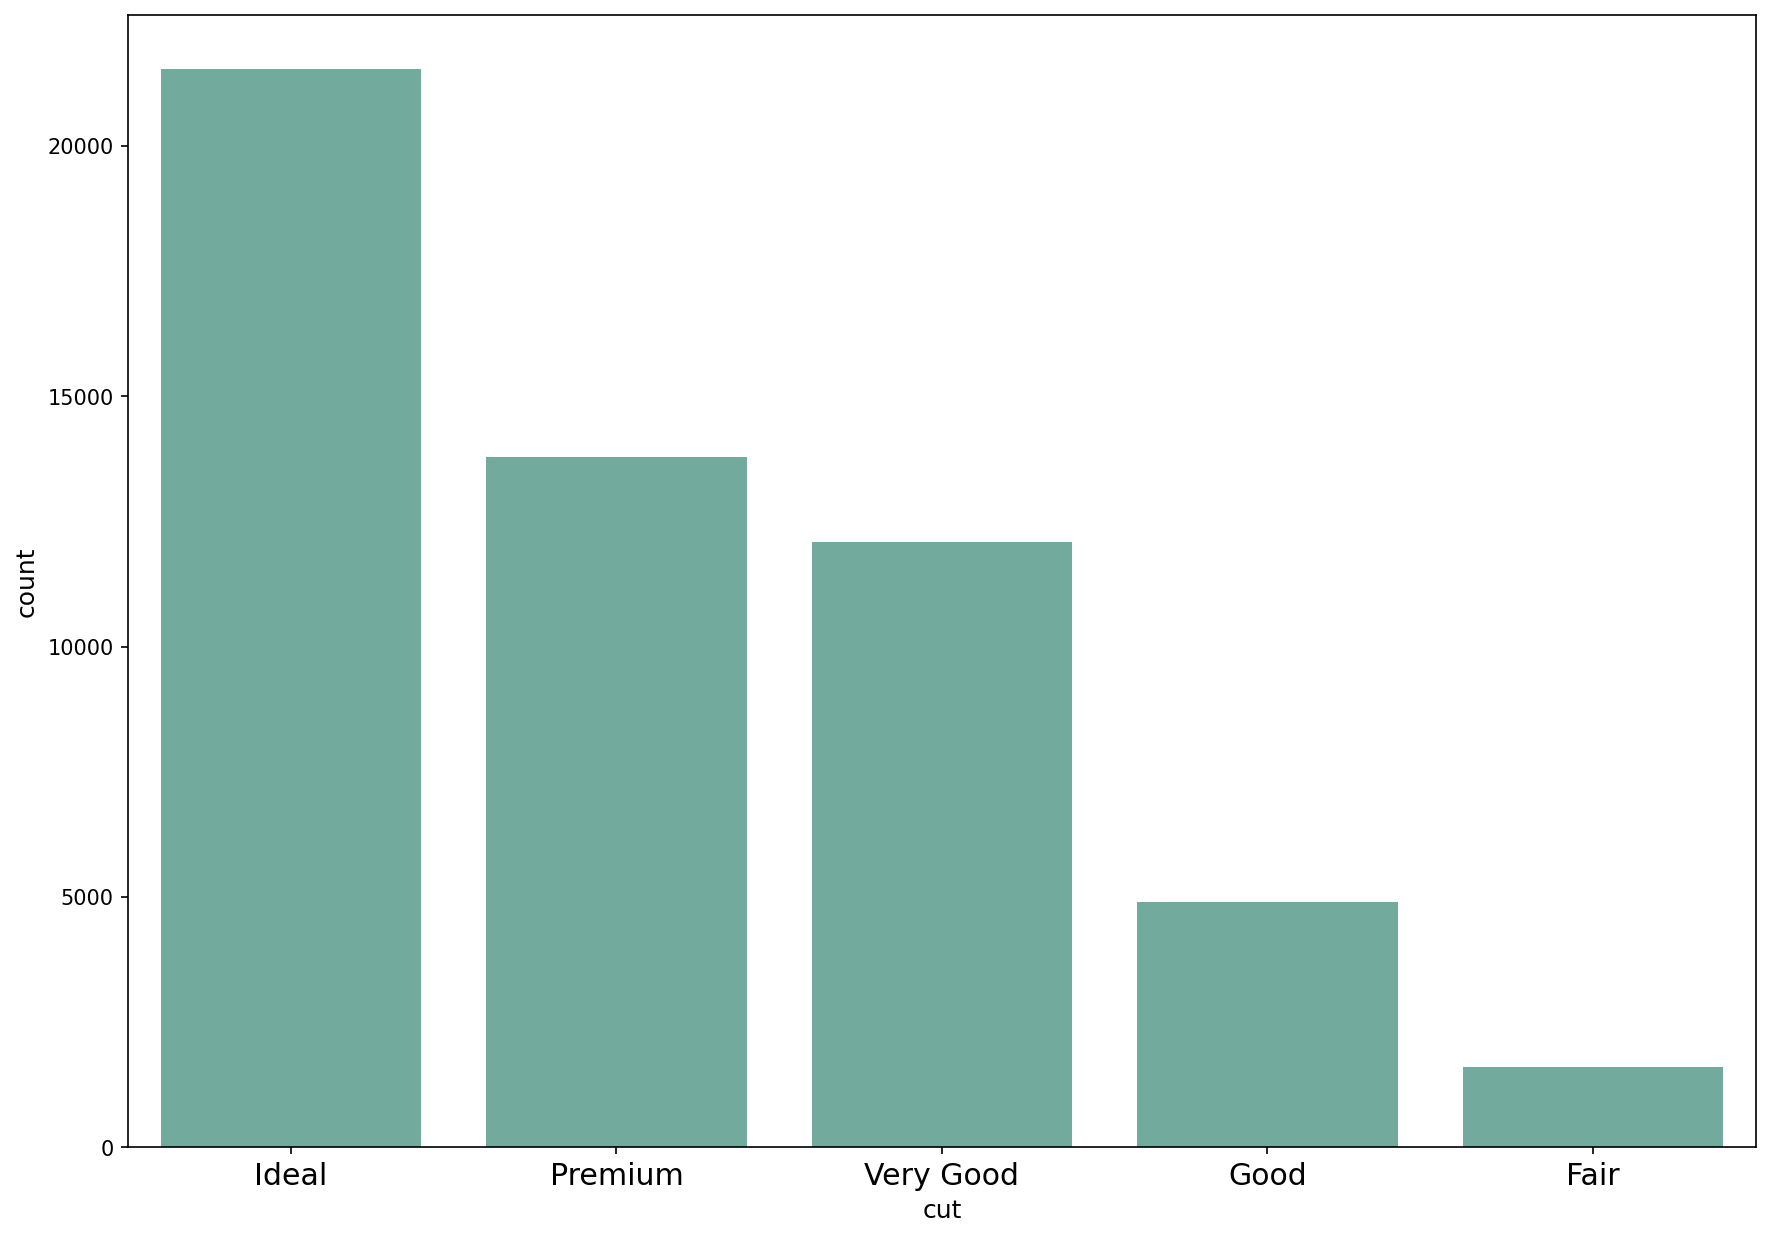

In [11]:
plt.figure(figsize=(14, 10))

sns.countplot(
    x= "cut", 
    data=data, 
    color='#69b3a2',
    order= ["Ideal","Premium","Very Good", "Good", "Fair"]
    );

Some histograms for every numeric feature

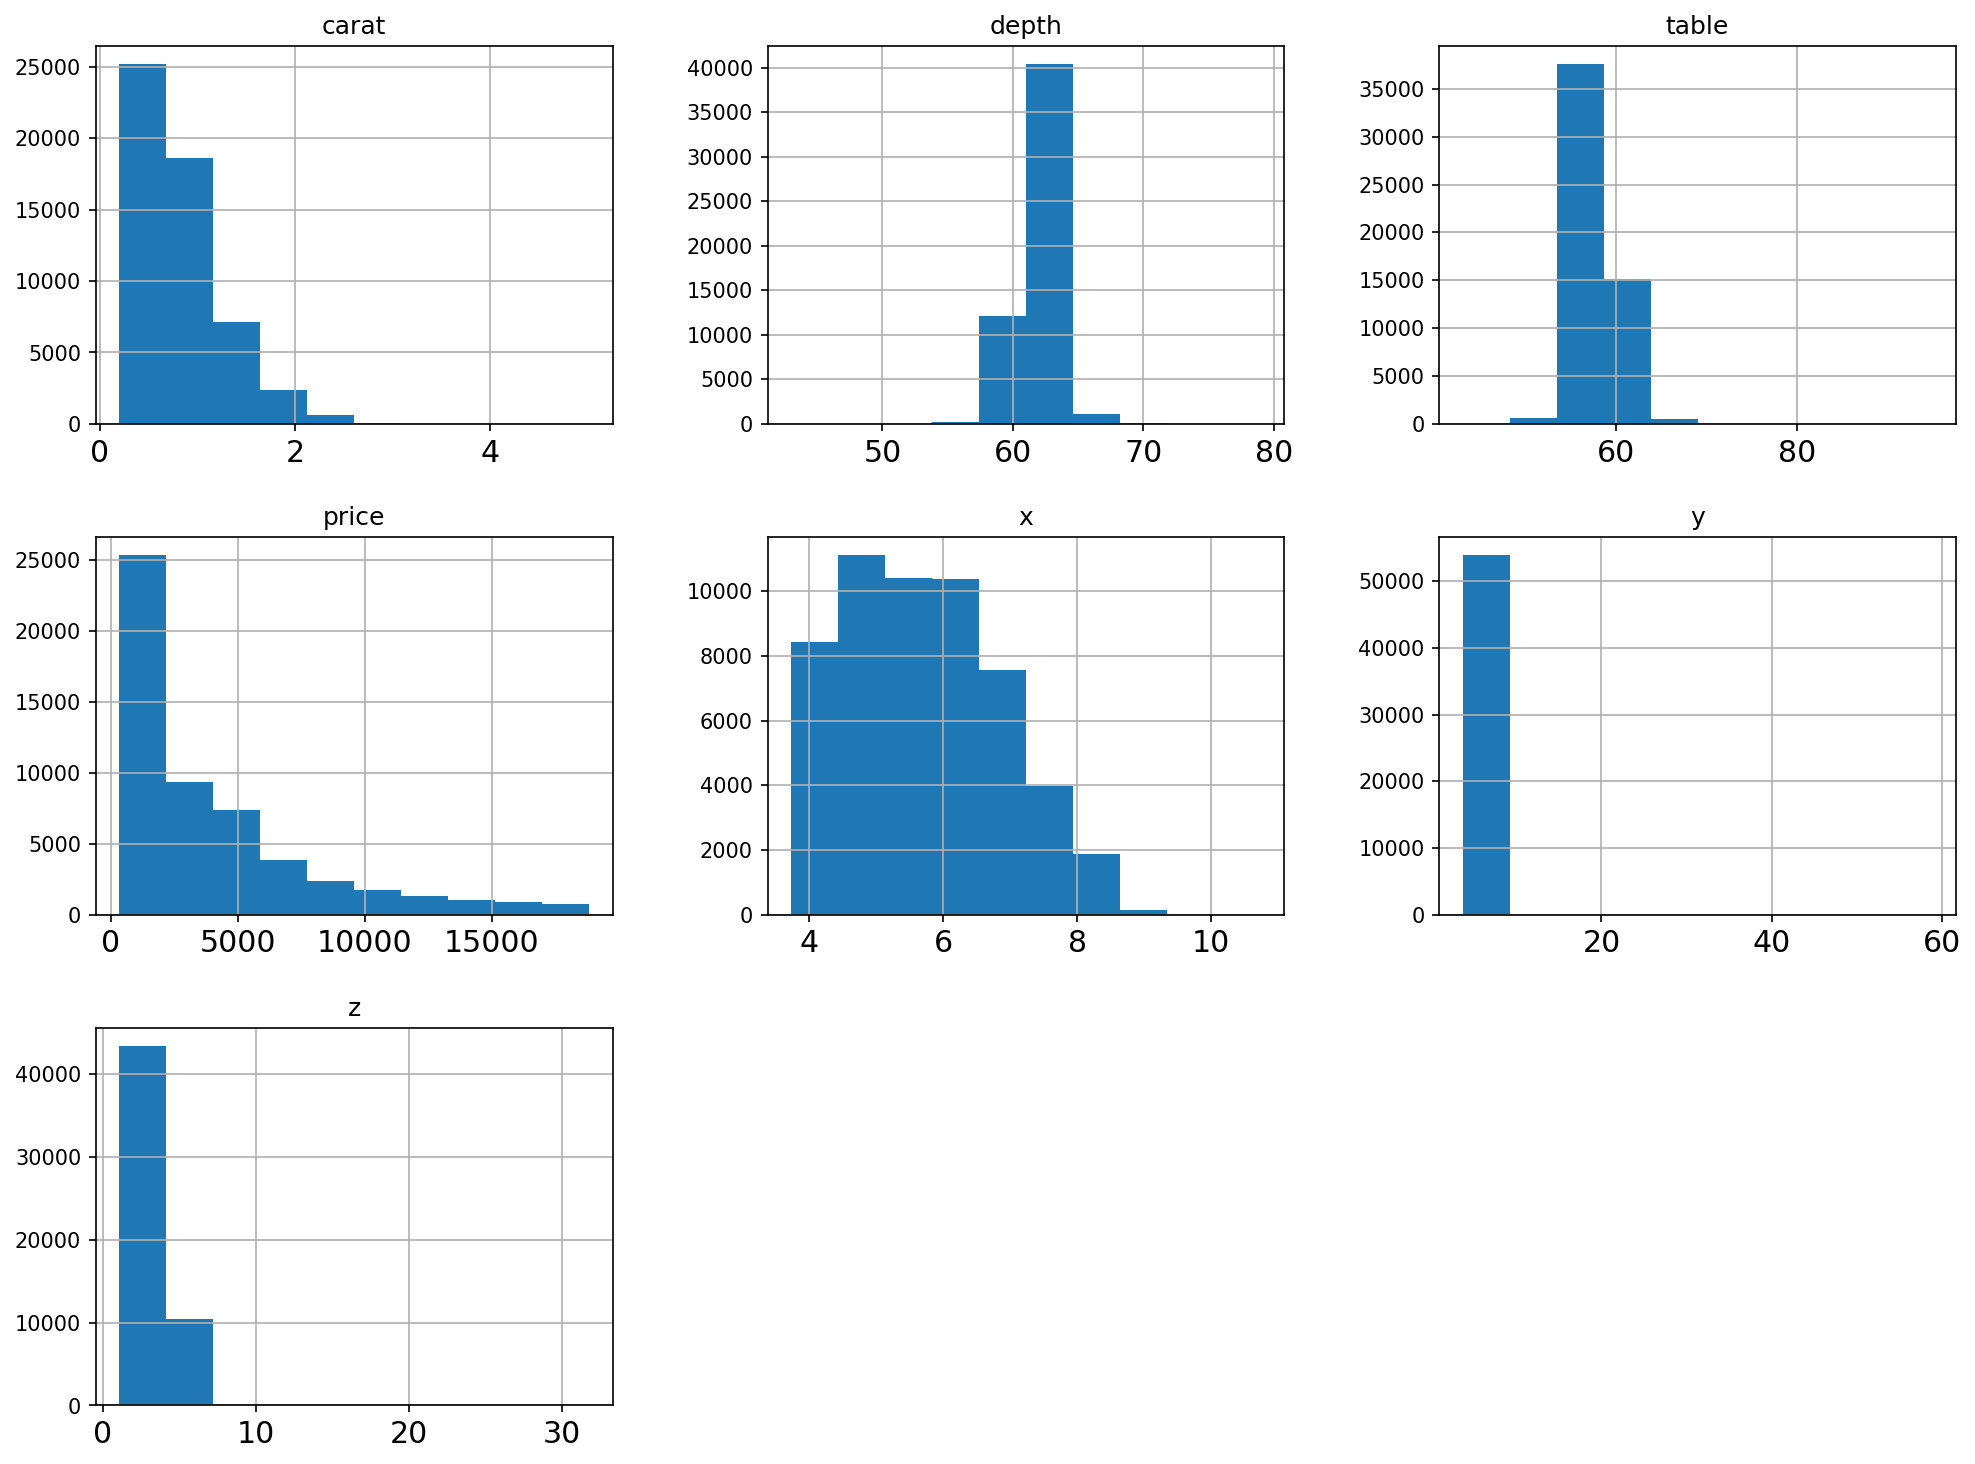

In [12]:
data.hist(figsize=(16, 12));

Both price and carat have skewed distributions, which are distributions where one of the tails is larger than the other. When this happens, we should fix them by using a logarithmic transformer

Make the data correlation, to see what features are more dependent on each other

<AxesSubplot:>

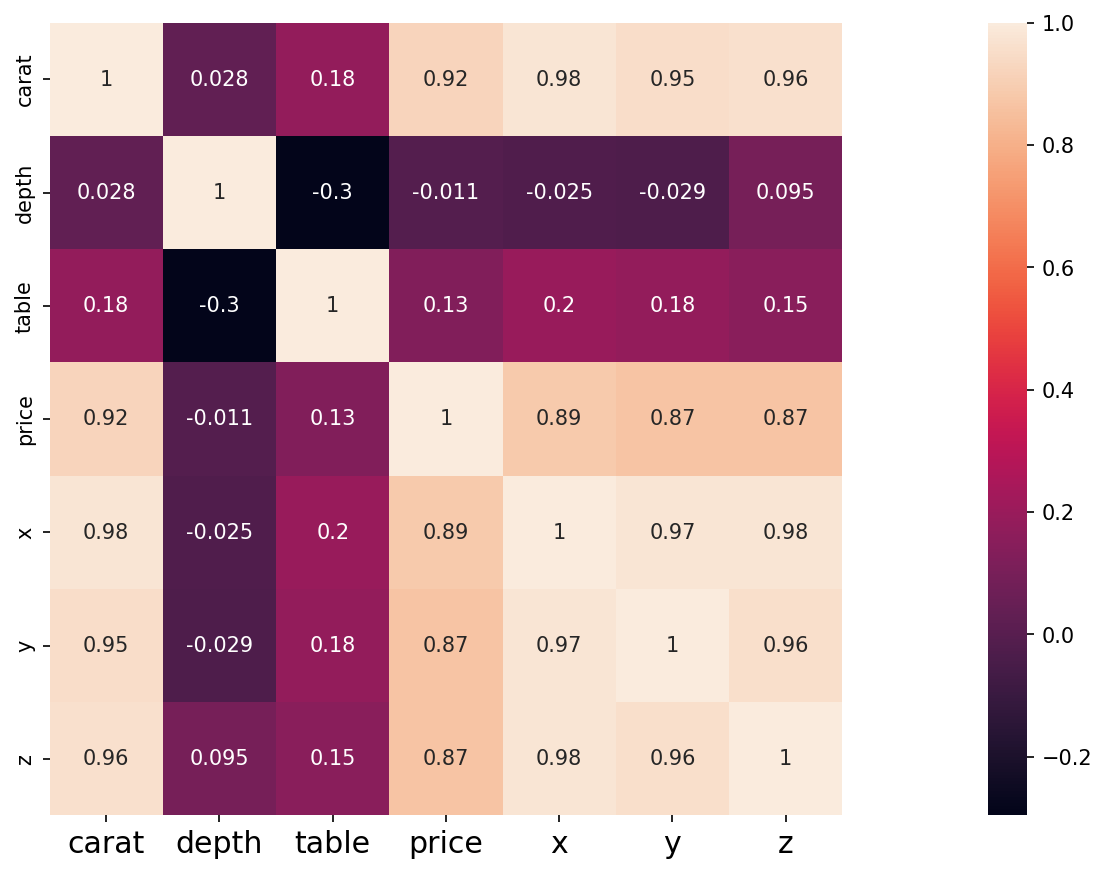

In [13]:
corr = data.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

## barplot of price per cut

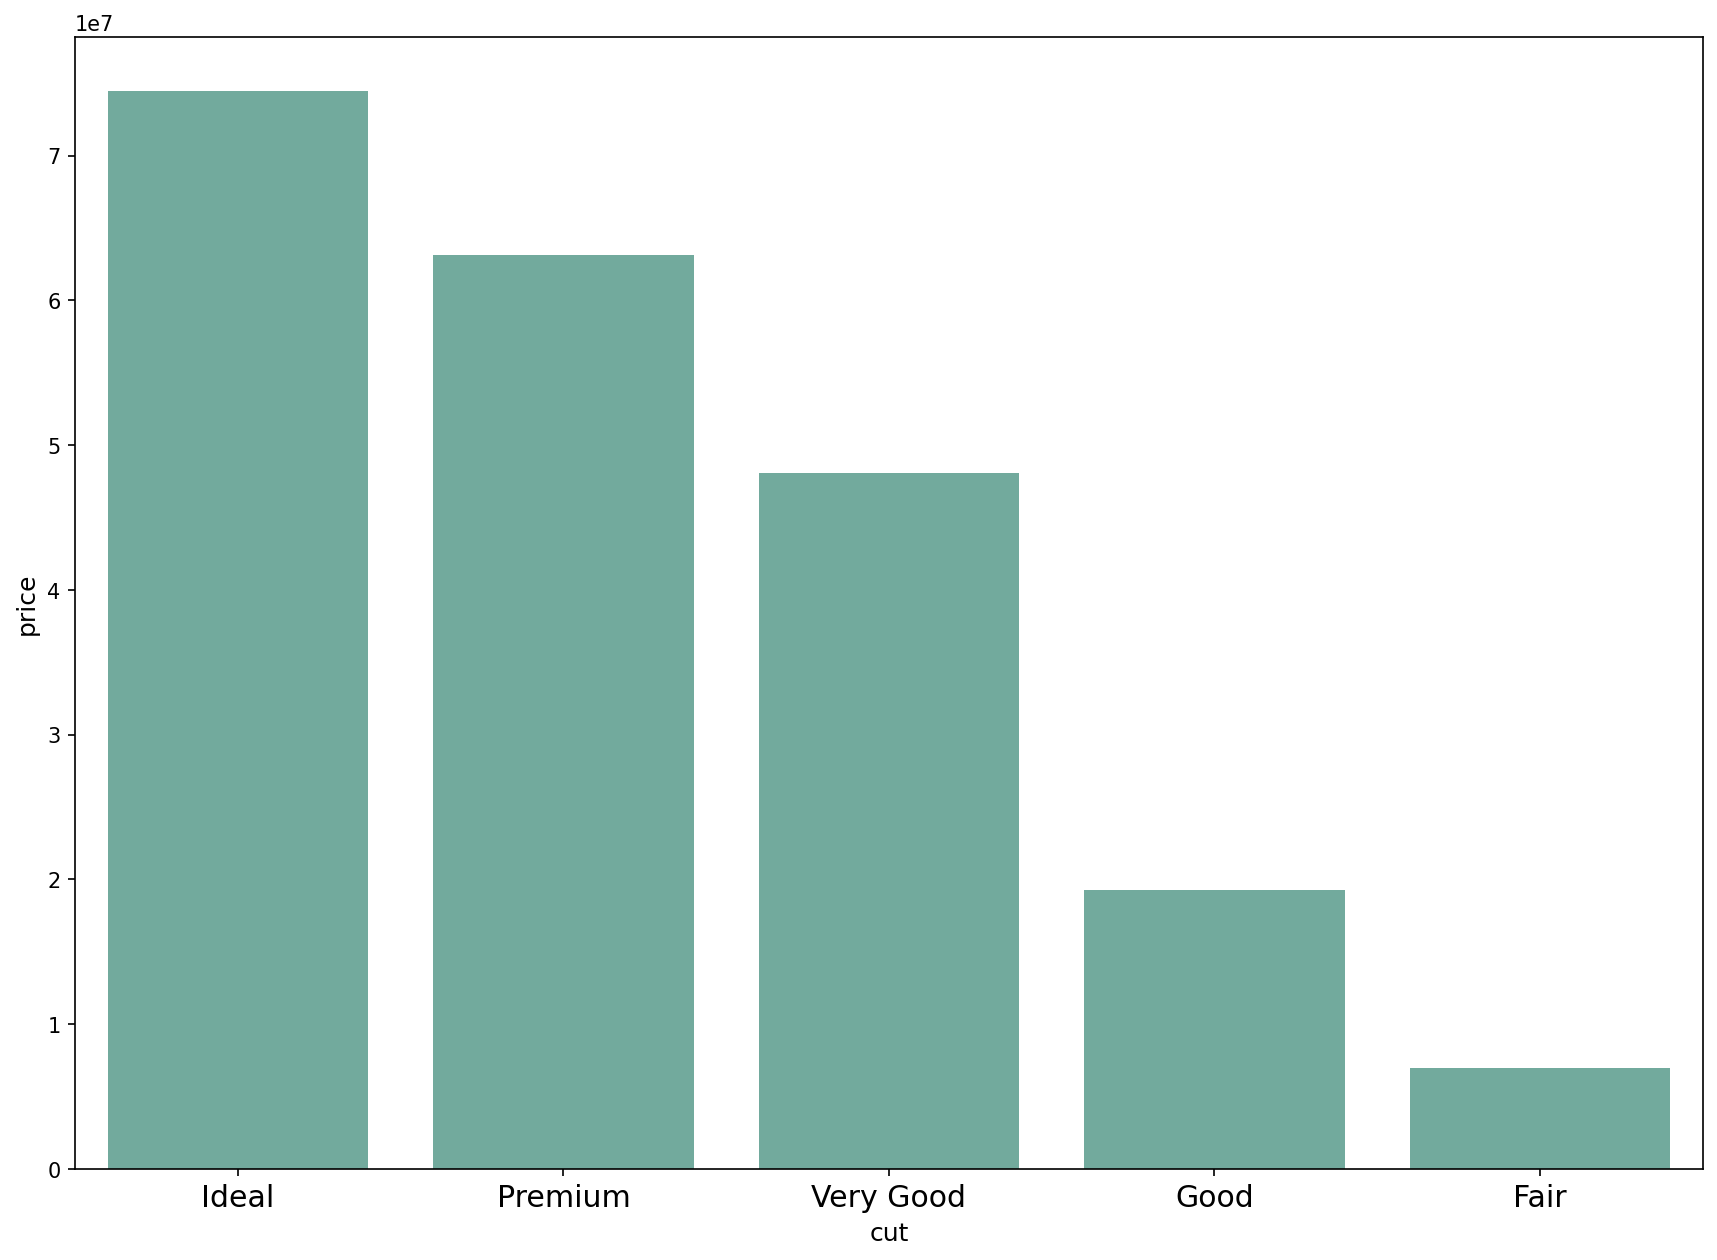

In [14]:


plt.figure(figsize=(14, 10))

sns.barplot(
    y="price", 
    x="cut", 
    data=data, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
    order= ["Ideal","Premium","Very Good", "Good", "Fair"]

    );

## The better the cut the bigger the price
## jump from good to very good

## barplot of depth per cut

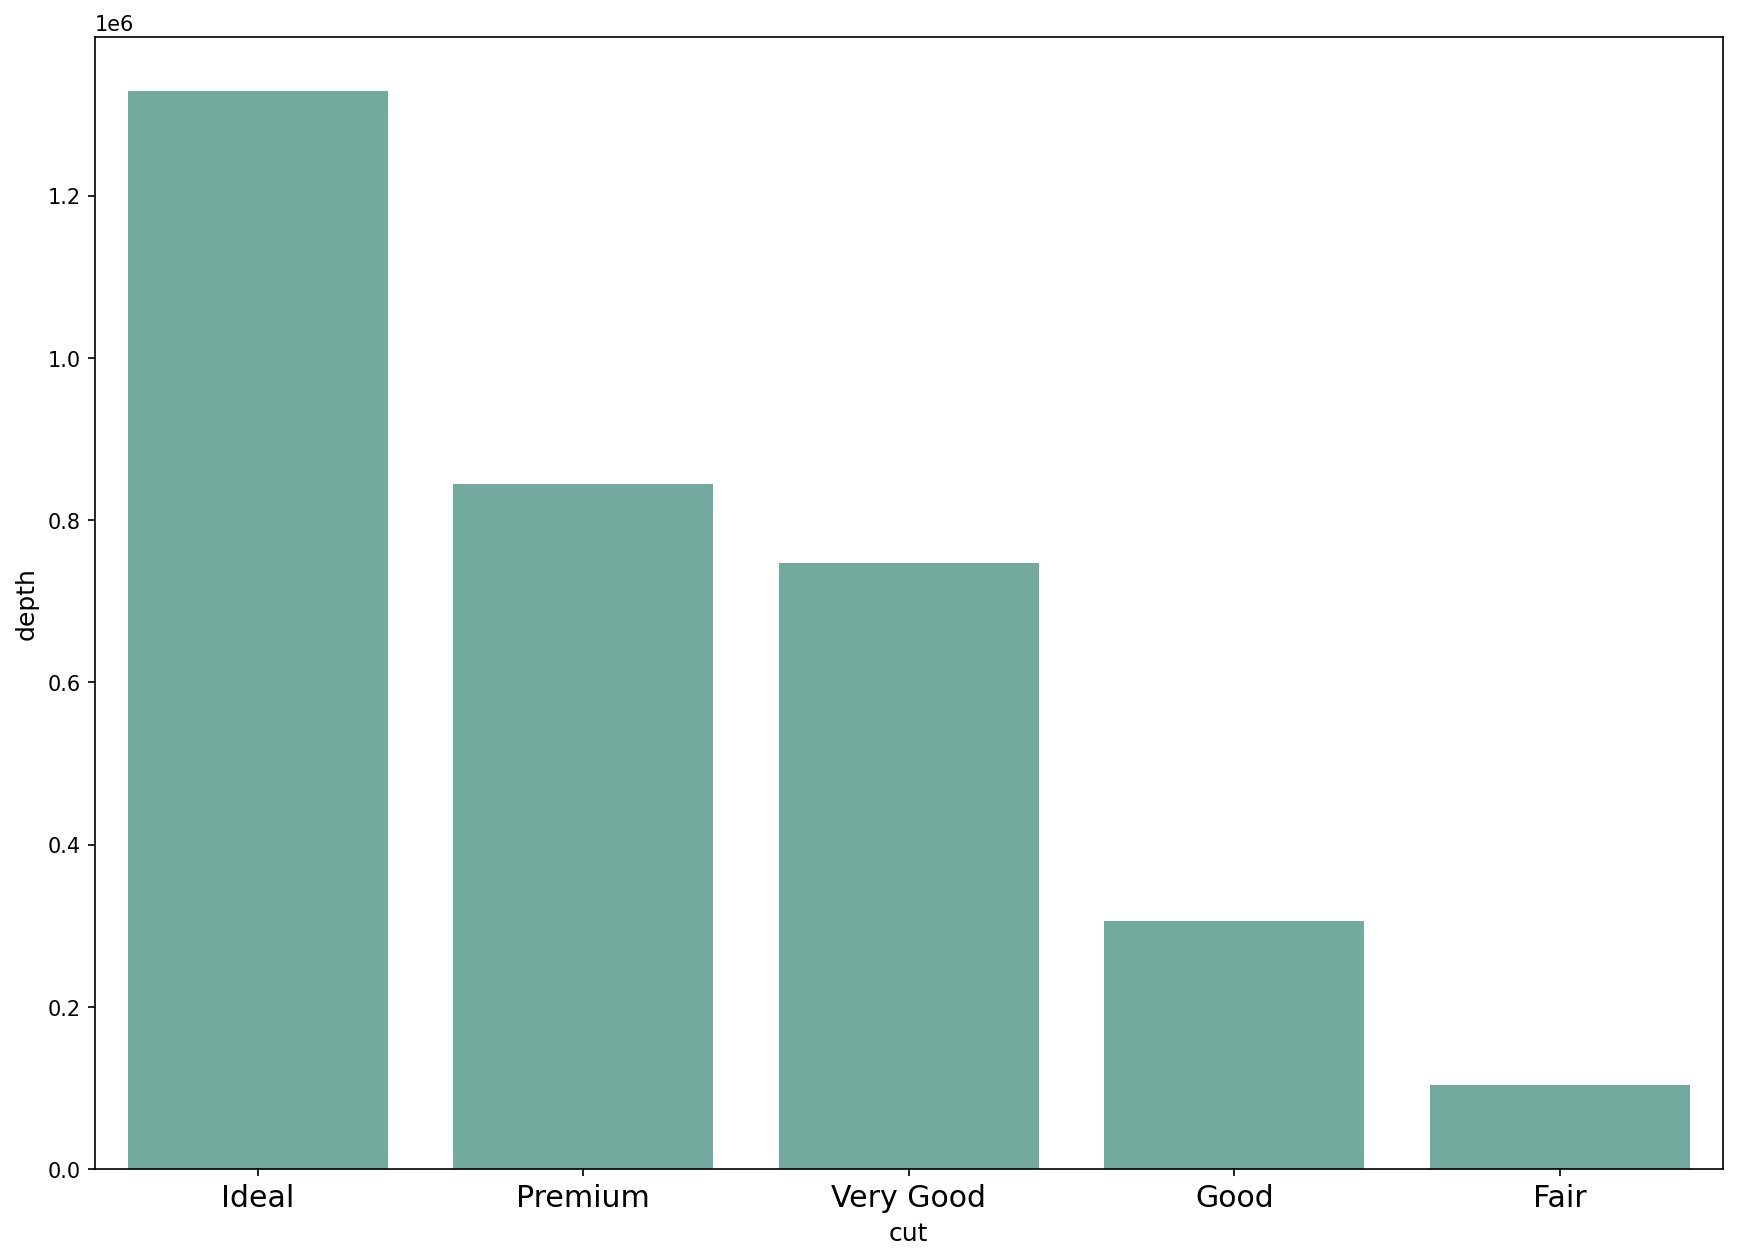

In [15]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y="depth", 
    x="cut", 
    data=data, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
    order= ["Ideal","Premium","Very Good", "Good", "Fair"]

    );

## barplot of carat per cut

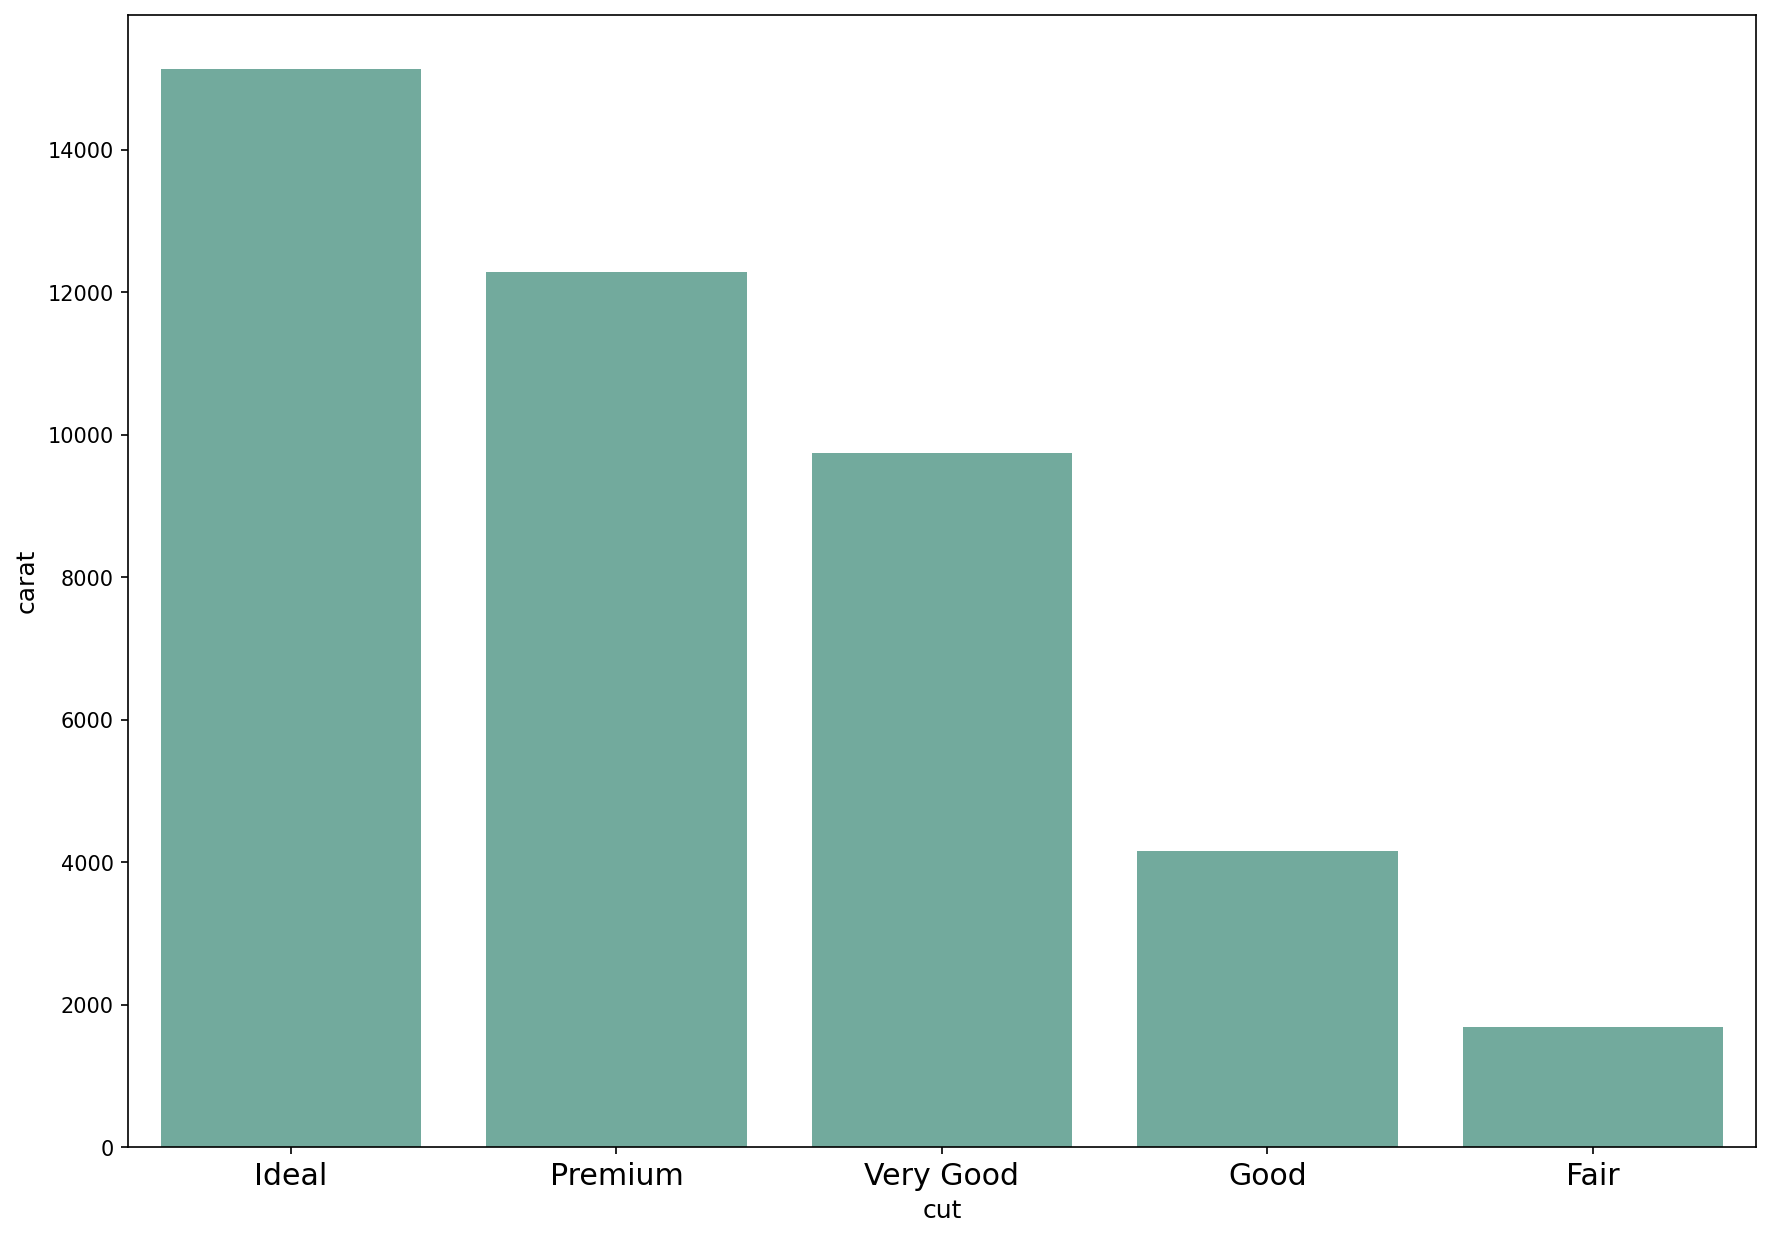

In [16]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y="carat", 
    x="cut", 
    data=data, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
    order= ["Ideal","Premium","Very Good", "Good", "Fair"]
    );

## barplot of table per cut

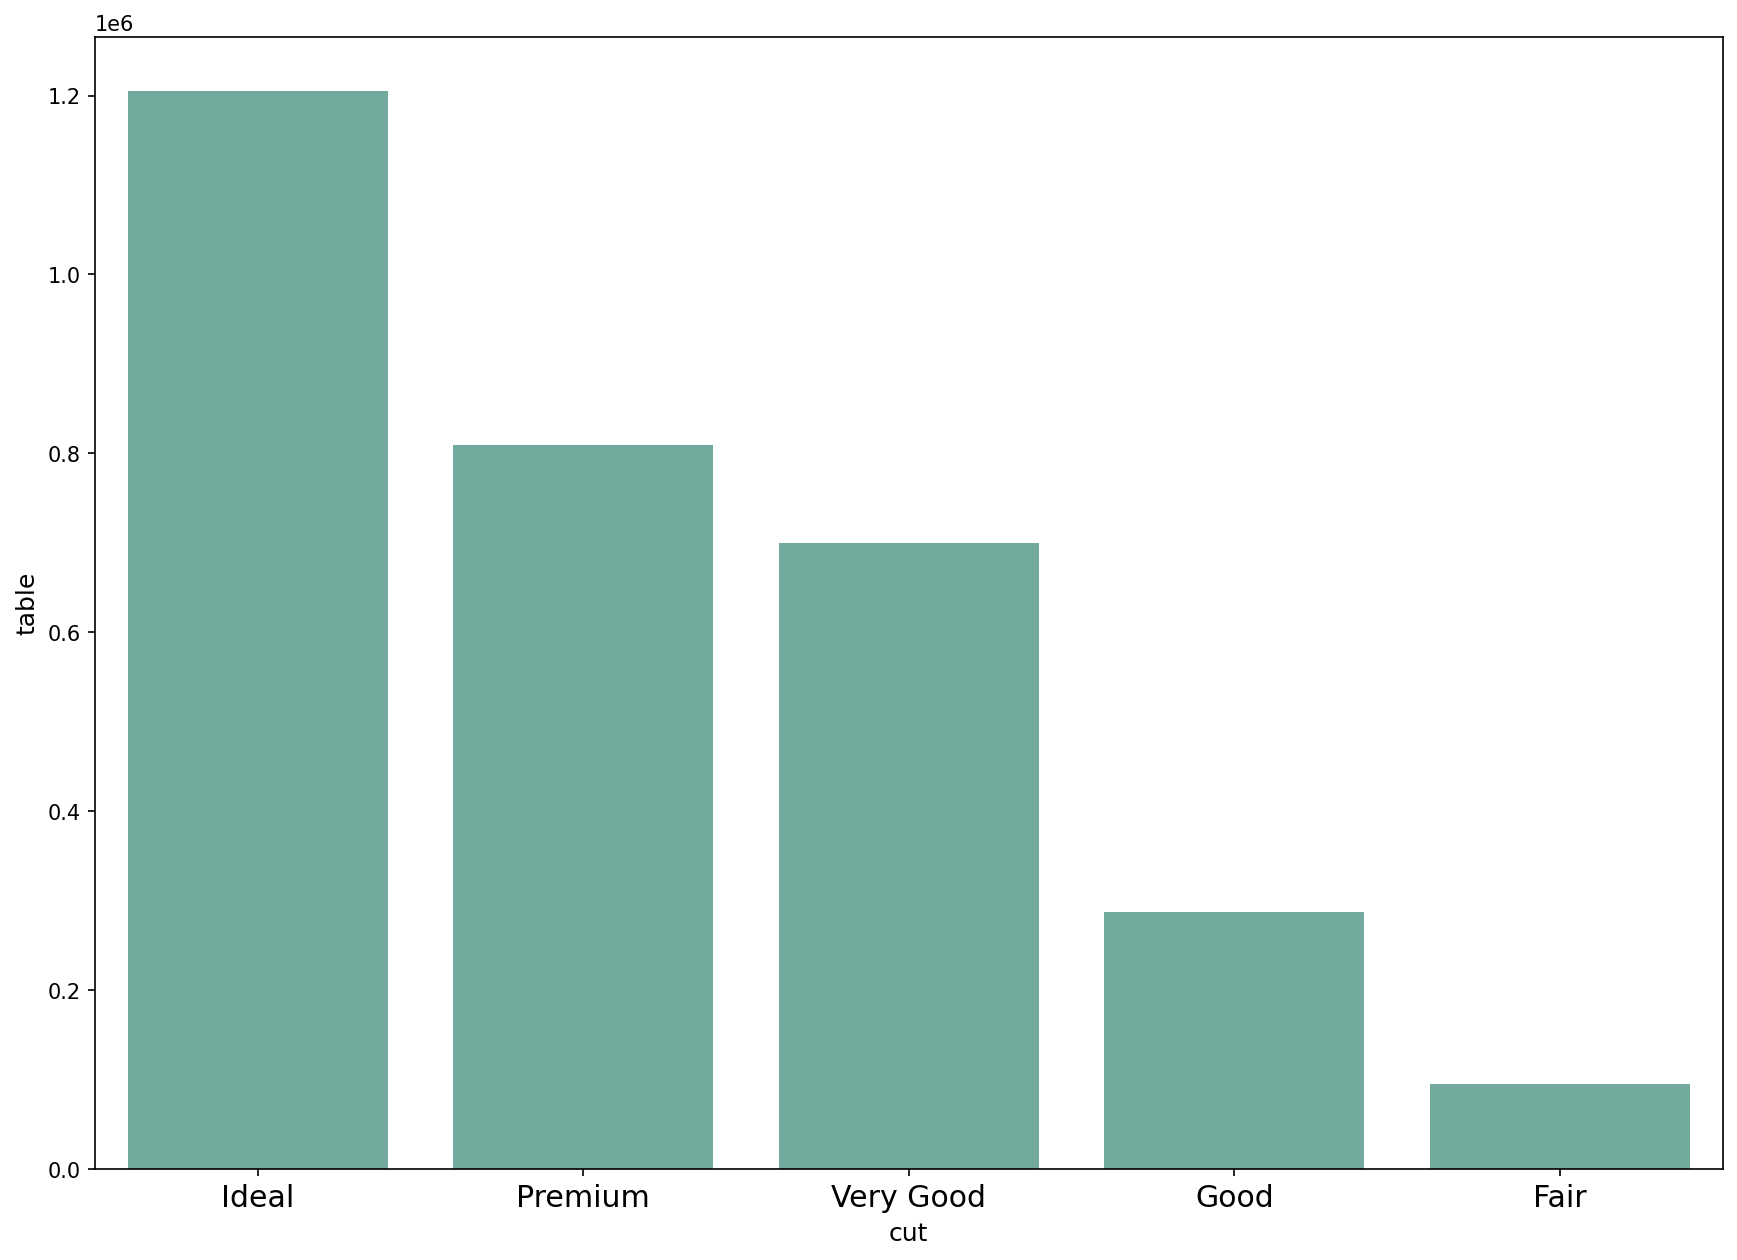

In [17]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y="table", 
    x="cut", 
    data=data, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
    order= ["Ideal","Premium","Very Good", "Good", "Fair"]
    );

## boxplot cut and price

<AxesSubplot:xlabel='cut', ylabel='price'>

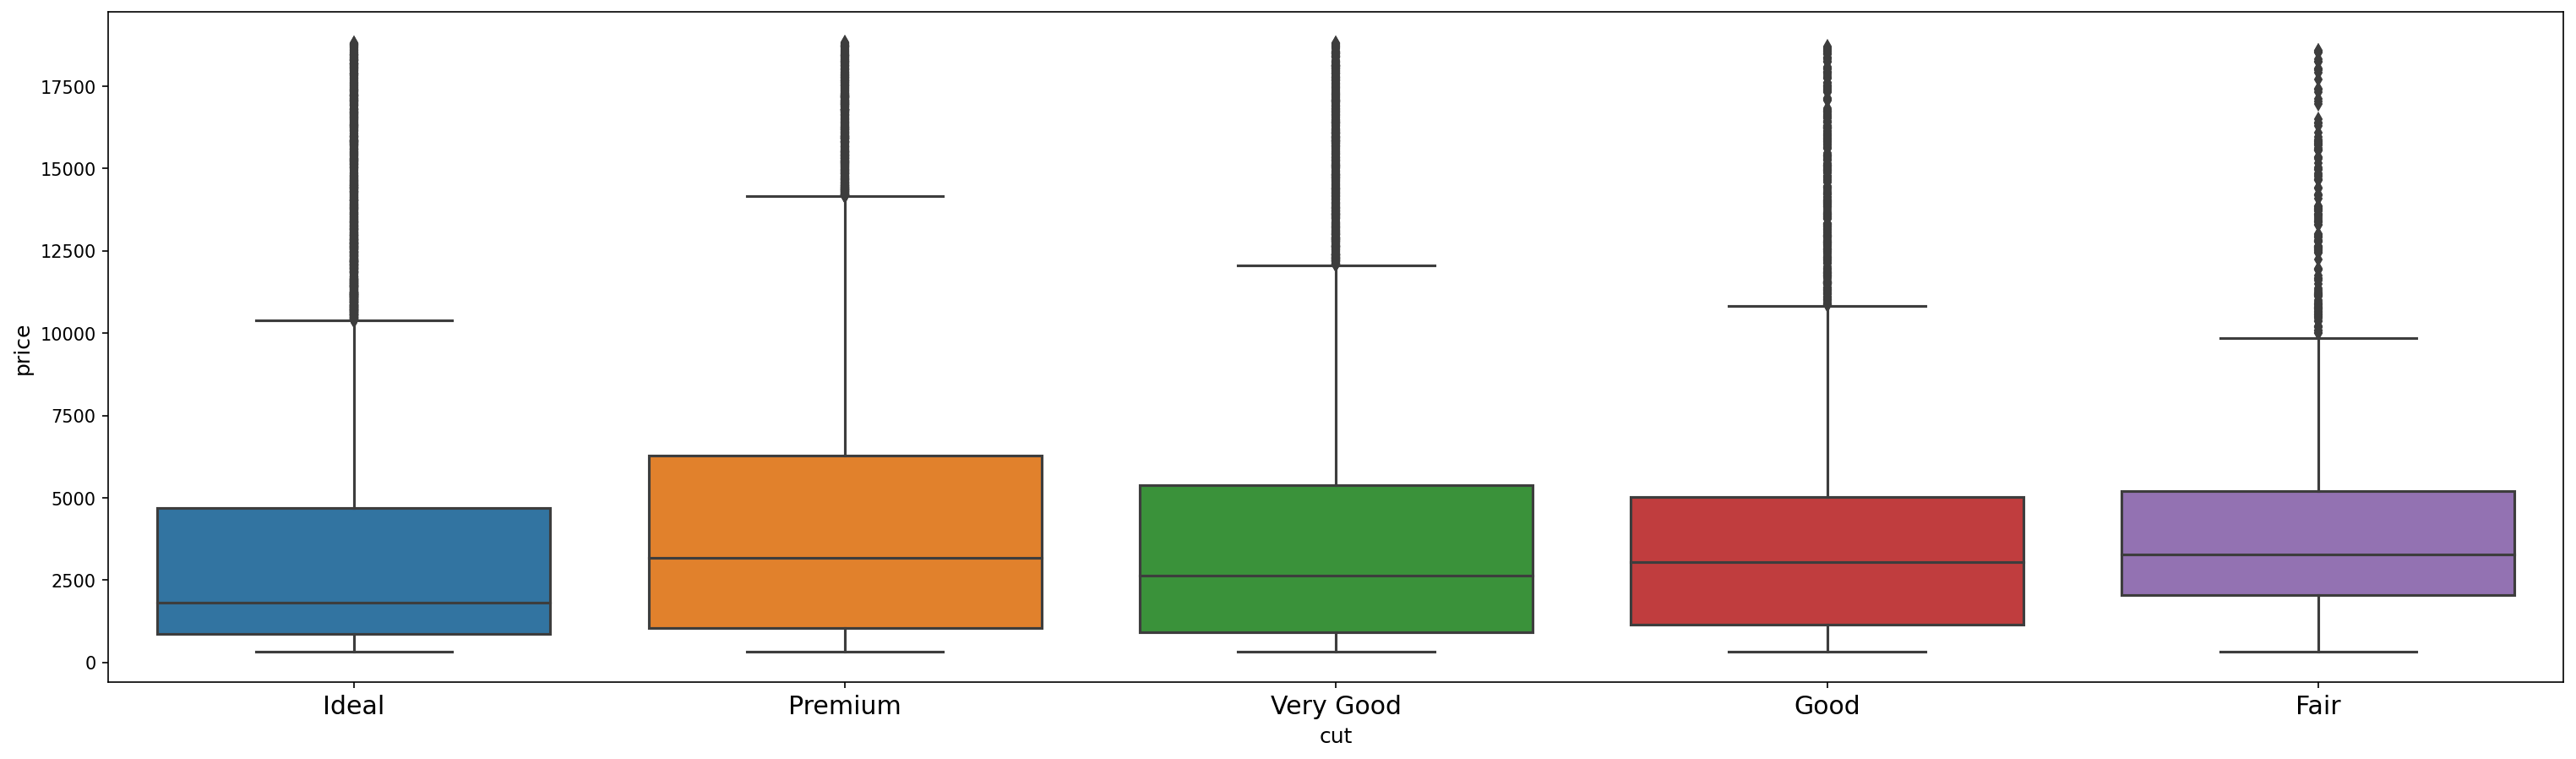

In [18]:
sns.boxplot( 
    x=data["cut"], 
    y=data["price"] ,
    order= ["Ideal","Premium","Very Good", "Good", "Fair"])

## Standardizing data and building Classifiers pipelines

In [19]:
from sklearn.model_selection import train_test_split


# Build a synthetic dataset
X, y = data.drop("cut", axis=1), data["cut"].values.flatten()



# Create train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1121218, test_size=0.33, stratify=y
)


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder, PowerTransformer, StandardScaler
  )

# Build categorical preprocessor
categorical_cols = X.select_dtypes(include="object").columns.to_list()
categorical_pipe = make_pipeline(
    OneHotEncoder(sparse=False, handle_unknown="ignore")
  )

# Build numeric processor
to_log = ["price", "carat"]
to_scale = ["x", "y", "z", "depth", "table"]
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

# Full processor
full = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, categorical_cols),
        ("power_transform", numeric_pipe_1, to_log),
        ("standardization", numeric_pipe_2, to_scale),
    ]
)

# Final pipeline combined with RandomForest
randomForest_pipeline = Pipeline(
    steps=[
        ("preprocess", full),
        (
            "base",
            RandomForestClassifier(max_depth=20),
        ),
    ]
)

logReg_pipeline = Pipeline(
    steps=[
        ("preprocess", full),
        (
            "base",
            LogisticRegression(max_iter=2000),
        ),
    ]
)

svm_pipeline = Pipeline(
    steps=[
        ("preprocess", full),
        (
            "base",
            SVC(kernel = 'linear', C = 1),
        ),
    ]
)
# Fit
_ = randomForest_pipeline.fit(X_train, y_train)
_ = logReg_pipeline.fit(X_train, y_train)
_ = svm_pipeline.fit(X_train, y_train)

## Classes definition

**Positive classes:** Ideal and Premium diamonds  
**Negative classes:** Very Good, Good, and Fair diamonds  
**True Positives, type 1:** actual Ideal, predicted Ideal  
**True Positives, type 2:** actual Premium, predicted Premium  
**True Negatives**: the rest of the diamond types predicted correctly  
**False Positives:** actual value belongs to any of the 3 negative classes but predicted either Ideal or Premium  
**False Negatives:** actual value is either Ideal or Premium but predicted by any of the 3 negative classes.  

## Random Forest Confusion Matrix and Precision, Recall and F1 scores

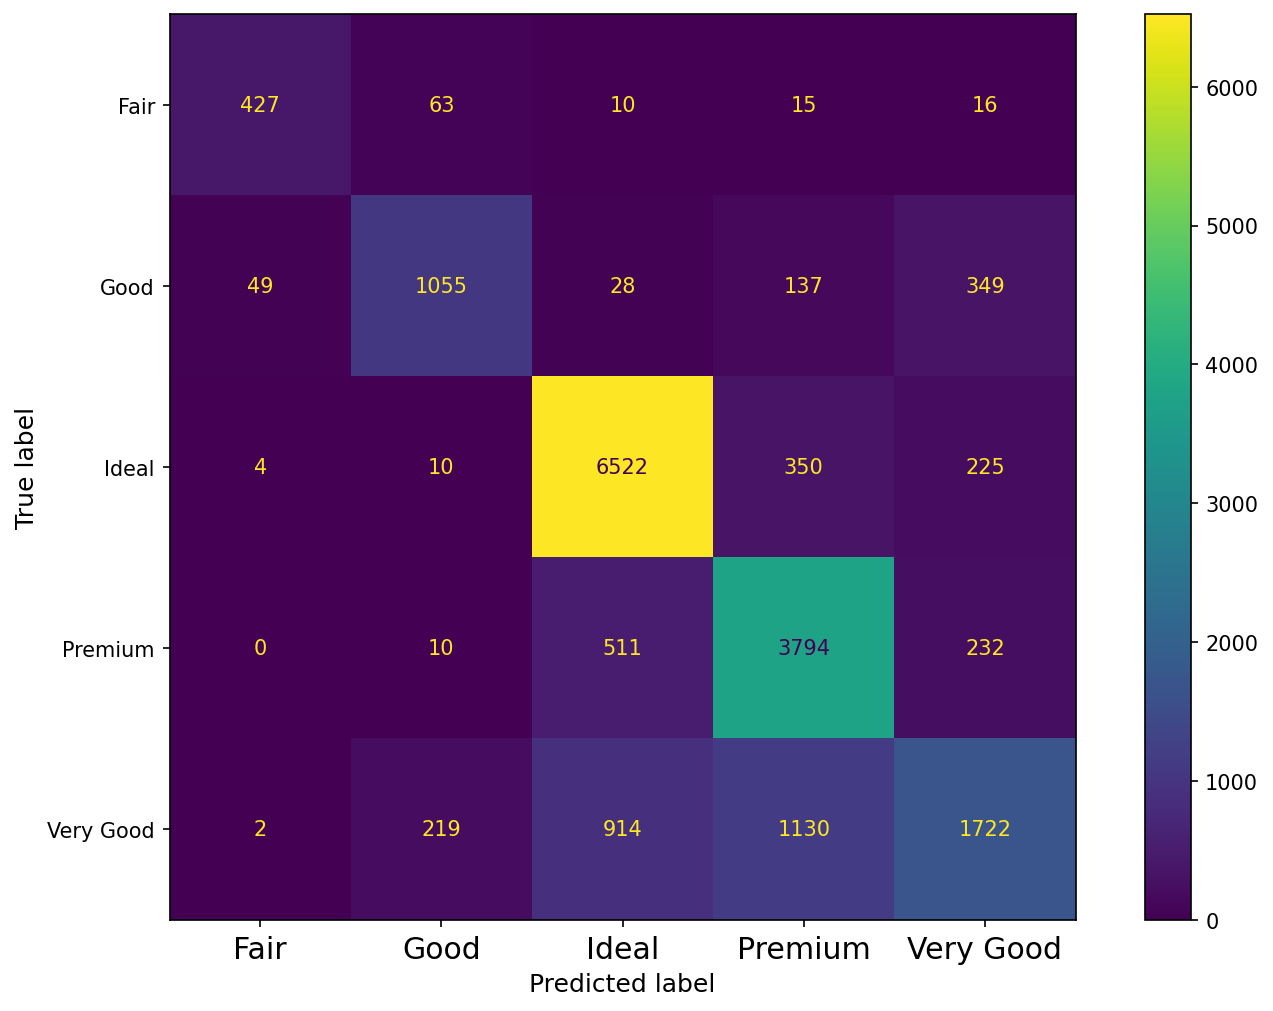

              precision    recall  f1-score   support

        Fair       0.89      0.80      0.84       531
        Good       0.78      0.65      0.71      1618
       Ideal       0.82      0.92      0.86      7111
     Premium       0.70      0.83      0.76      4547
   Very Good       0.68      0.43      0.53      3987

    accuracy                           0.76     17794
   macro avg       0.77      0.73      0.74     17794
weighted avg       0.75      0.76      0.75     17794

0.8238124861107949


In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_randomForest = randomForest_pipeline.predict(X_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_randomForest)
cmp = ConfusionMatrixDisplay(cm, display_labels=randomForest_pipeline.classes_)
cmp.plot(ax=ax)

plt.show();

print(classification_report(y_test, y_pred_randomForest))
randomForest_base_f1Score = f1_score(y_test, y_pred_randomForest, average="weighted", labels=["Ideal", "Premium"])
print(randomForest_base_f1Score)

In [22]:
report_base_randomForest = classification_report(y_test, y_pred_randomForest, output_dict=True)
report_base_randomForest = pd.DataFrame(report_base_randomForest).transpose()

## Logistic Regression Confusion Matrix and Precision, Recall and F1 scores

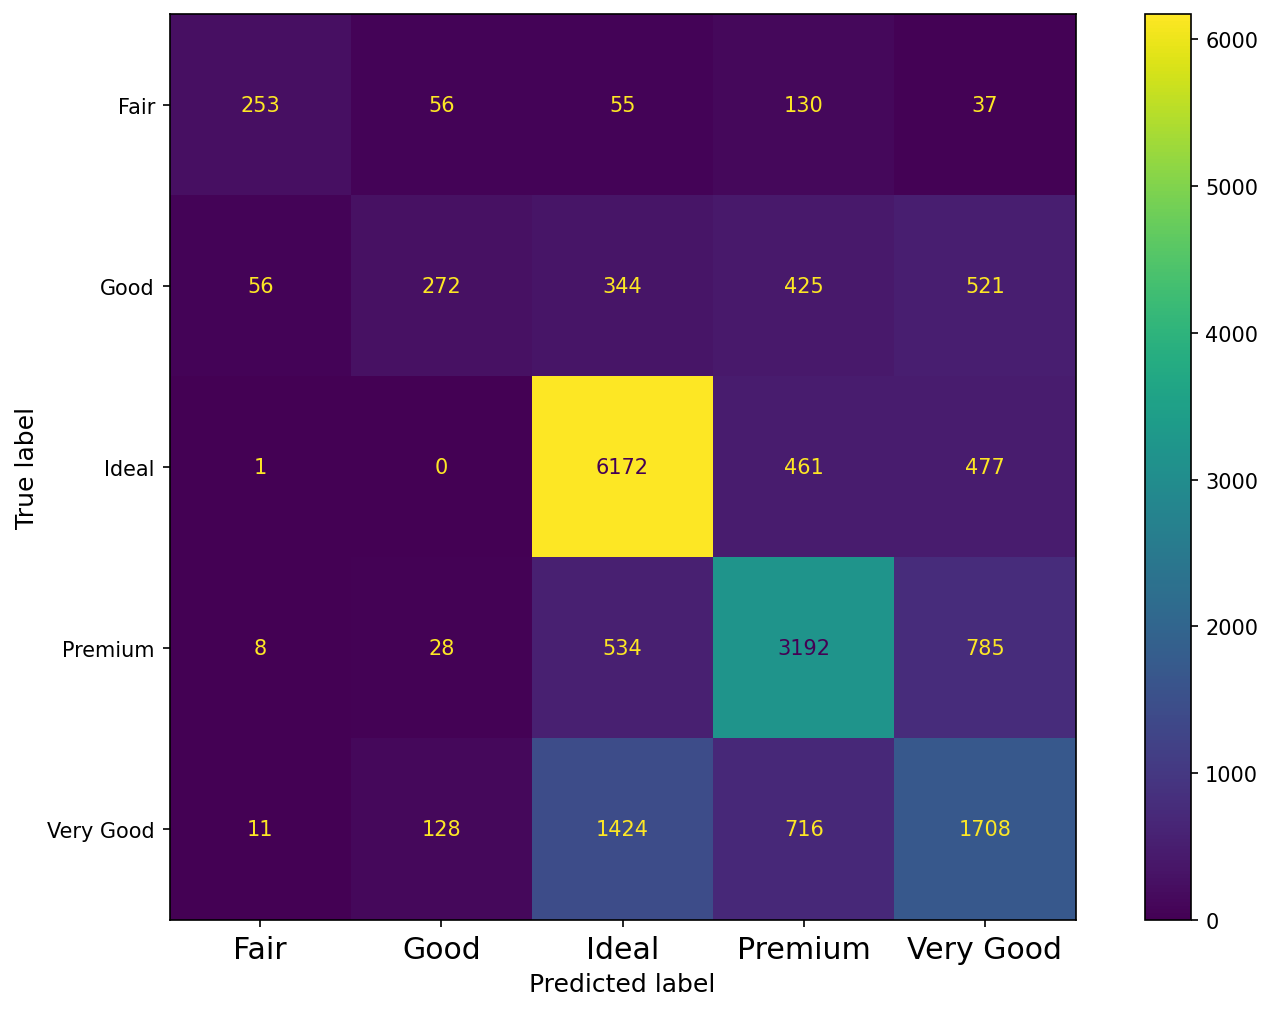

              precision    recall  f1-score   support

        Fair       0.77      0.48      0.59       531
        Good       0.56      0.17      0.26      1618
       Ideal       0.72      0.87      0.79      7111
     Premium       0.65      0.70      0.67      4547
   Very Good       0.48      0.43      0.45      3987

    accuracy                           0.65     17794
   macro avg       0.64      0.53      0.55     17794
weighted avg       0.64      0.65      0.63     17794

0.7443262986631658


In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_logReg = logReg_pipeline.predict(X_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_logReg)
cmp = ConfusionMatrixDisplay(cm, display_labels=logReg_pipeline.classes_)
cmp.plot(ax=ax)

plt.show();

print(classification_report(y_test, y_pred_logReg))
logReg_base_f1Score = f1_score(y_test, y_pred_logReg, average="weighted", labels=["Ideal", "Premium"])
print(logReg_base_f1Score)

In [24]:
report_base_logReg = classification_report(y_test, y_pred_logReg, output_dict=True)
report_base_logReg = pd.DataFrame(report_base_logReg).transpose()

## SVM Confusion Matrix and Precision, Recall and F1 scores

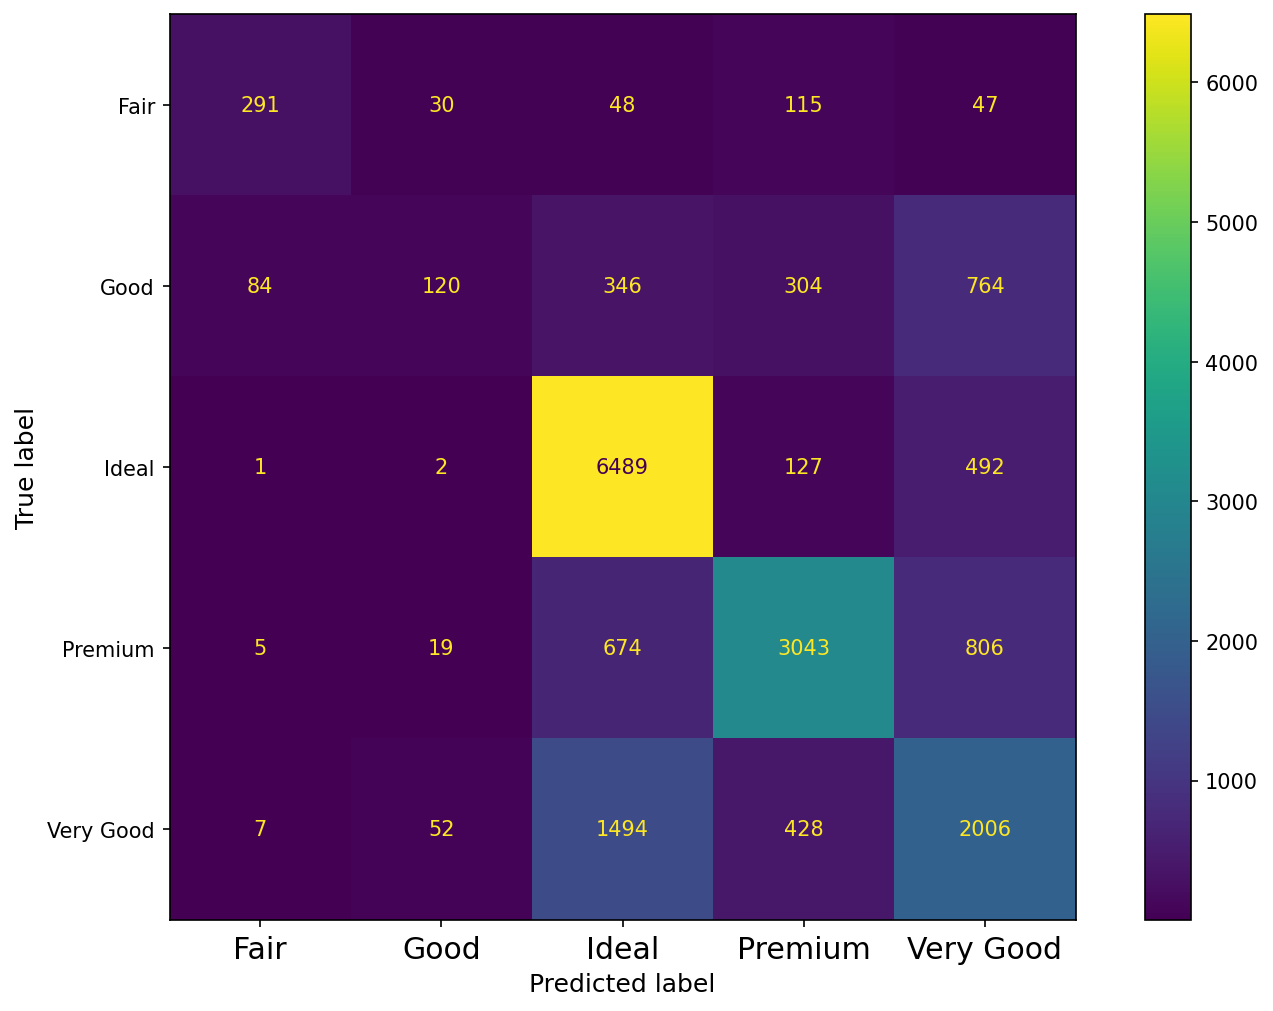

              precision    recall  f1-score   support

        Fair       0.75      0.55      0.63       531
        Good       0.54      0.07      0.13      1618
       Ideal       0.72      0.91      0.80      7111
     Premium       0.76      0.67      0.71      4547
   Very Good       0.49      0.50      0.50      3987

    accuracy                           0.67     17794
   macro avg       0.65      0.54      0.55     17794
weighted avg       0.66      0.67      0.64     17794

0.7669769434948462


In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_svm = svm_pipeline.predict(X_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_svm)
cmp = ConfusionMatrixDisplay(cm, display_labels=svm_pipeline.classes_)
cmp.plot(ax=ax)

plt.show();
print(classification_report(y_test, y_pred_svm))
svm_base_f1Score = f1_score(y_test, y_pred_svm, average="weighted", labels=["Ideal", "Premium"])
print(svm_base_f1Score)

In [26]:
report_base_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_base_svm = pd.DataFrame(report_base_svm).transpose()

## Hyperparameter tuning of Random Forest Classifier

In [27]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 7, 10]
min_samples_leaf = [1, 2, 3, 4]

param_grid = {
    "base__n_estimators": n_estimators,
    "base__max_depth": max_depth,
    "base__min_samples_split": min_samples_split,
    "base__min_samples_leaf": min_samples_leaf,
}

In [28]:
from sklearn.metrics import make_scorer

custom_f1 = make_scorer(
    f1_score, greater_is_better=True, average="weighted", labels=["Ideal", "Premium"]
  )



In [29]:
hrs_randomForest = RandomizedSearchCV(
    estimator=randomForest_pipeline,
    param_distributions=param_grid,
    scoring=custom_f1,
    cv=3,
    n_iter=60,
    n_jobs=-1,
)
# Fit
hrs_randomForest.fit(X, y)

# Score
best_estimator_randomForest = hrs_randomForest.best_estimator_
y_pred_randomForest = best_estimator_randomForest.predict(X_test)
randomForest_tuned_f1Score = f1_score(y_test, y_pred_randomForest, average="weighted", labels=["Ideal", "Premium"])

In [30]:
best_score_randomForest = hrs_randomForest.best_score_
report_randomForest = classification_report(y_test, y_pred_randomForest, output_dict=True)
report_randomForest = pd.DataFrame(report_randomForest).transpose()

print("Best score: " ,best_score_randomForest)
print("\nBest estimator")
print(hrs_randomForest.best_estimator_)
print()
print("Best params: ", hrs_randomForest.best_params_)
print()
print("Tuned F1-score", randomForest_tuned_f1Score)
print()
print(report_randomForest)

Best score:  0.5928536348288032

Best estimator
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['color', 'clarity']),
                                                 ('power_transform',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  ['price', 'carat']),
                                                 ('standardization',
                                                  Pipeline(steps=[('standardscaler',
                       

## Hyperparameter tuning of Logistic Regression

In [31]:
solvers = ['lbfgs']
penalty = ['l2', 'none']
C = np.logspace(-4, 4, 50)

param_grid = {
    "base__solver": solvers,
    "base__penalty": penalty,
    "base__C": C,
}

hrs_logReg = RandomizedSearchCV(
    estimator=logReg_pipeline,
    param_distributions=param_grid,
    scoring=custom_f1,
    cv=3,
    n_iter=60,
    n_jobs=-1,
)
# Fit
_ = hrs_logReg.fit(X, y)

# Score
best_estimator_logReg = hrs_logReg.best_estimator_
y_pred_logReg = best_estimator_logReg.predict(X_test)
logReg_tuned_f1Score = f1_score(y_test, y_pred_logReg, average="weighted", labels=["Ideal", "Premium"])

In [32]:
best_score_logReg = hrs_logReg.best_score_
report_logReg = classification_report(y_test, y_pred_logReg, output_dict=True)
report_logReg = pd.DataFrame(report_logReg).transpose()

print("Best score: " ,best_score_logReg)
print("\nBest estimator")
print(hrs_logReg.best_estimator_)
print()
print("Best params: ", hrs_logReg.best_params_)
print()
print("Tuned F1-score", logReg_tuned_f1Score)
print()
print(report_logReg)

Best score:  0.7180644628657791

Best estimator
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['color', 'clarity']),
                                                 ('power_transform',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  ['price', 'carat']),
                                                 ('standardization',
                                                  Pipeline(steps=[('standardscaler',
                       

## Hyperparameter tuning of SVM

In [33]:
kernel = ['rbf']
param_grid = {
    "base__C": C,
    "base__kernel":kernel,
}

hrs_svm = RandomizedSearchCV(
    estimator=svm_pipeline,
    param_distributions=param_grid,
    scoring=custom_f1,
    cv=3,
    n_iter=60,
    n_jobs=-1,
)
# Fit
_ = hrs_svm.fit(X, y)

# Score

best_estimator_svm = hrs_svm.best_estimator_
y_pred_svm = best_estimator_svm.predict(X_test)
svm_tuned_f1Score = f1_score(y_test, y_pred_svm, average="weighted", labels=["Ideal", "Premium"])

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 50 is smaller than n_iter=60. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [34]:
best_score_svm = hrs_svm.best_score_
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_svm = pd.DataFrame(report_svm).transpose()

print("Best score: " ,best_score_svm)
print("\nBest estimator")
print(hrs_svm.best_estimator_)
print()
print("Best params: ", hrs_svm.best_params_)
print()
print("Tuned F1-score", svm_tuned_f1Score)
print()
print(report_svm)

Best score:  0.7147978135423694

Best estimator
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['color', 'clarity']),
                                                 ('power_transform',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  ['price', 'carat']),
                                                 ('standardization',
                                                  Pipeline(steps=[('standardscaler',
                       

## Conclusion

In [36]:
f1_score_base_randomForest = report_base_randomForest.values[:,2]
f1_score_base_logReg = report_base_logReg.values[:,2]
f1_score_base_svm = report_base_svm.values[:,2]
f1_score_tuned_randomForest = report_randomForest.values[:,2]
f1_score_tuned_logReg = report_logReg.values[:,2]
f1_score_tuned_svm = report_svm.values[:,2]

dic = {'Base RandomForest':f1_score_base_randomForest,'Tuned RandomForest':f1_score_tuned_randomForest, 'Base LogReg':f1_score_base_logReg,'Tuned LogReg':f1_score_tuned_logReg,'Base SVM':f1_score_base_svm,'Tuned SVM':f1_score_tuned_svm}
final_table = pd.DataFrame(dic, index=['Fair', 'Good', 'Ideal', 'Premium', 'Very Good', 'accuracy', 'macro avg', 'weighted avg'])
print("F1 Scores of models before and after hyperparameter tuning")
display(final_table)

F1 Scores of models before and after hyperparameter tuning


,Base RandomForest,Tuned RandomForest,Base LogReg,Tuned LogReg,Base SVM,Tuned SVM
Fair,0.843040,0.856574,0.588372,0.572717,0.633297,0.819979
Good,0.709244,0.727794,0.258801,0.254893,0.130364,0.654978
Ideal,0.864070,0.860459,0.789258,0.788000,0.802995,0.854548
Premium,0.760854,0.734839,0.674058,0.681582,0.710649,0.730999
Very Good,0.527331,0.451168,0.454558,0.476873,0.495186,0.431676
accuracy,0.759807,0.747106,0.651737,0.655951,0.671518,0.727436
macro avg,0.740908,0.726167,0.553009,0.554813,0.554498,0.698436
weighted avg,0.747538,0.724472,0.630597,0.636194,0.644202,0.709048


In [37]:
rF = [randomForest_base_f1Score, randomForest_tuned_f1Score]
lR = [logReg_base_f1Score, logReg_tuned_f1Score]
sVM = [svm_base_f1Score, svm_tuned_f1Score]
dic = {'Random Forest':rF, 'LogReg':lR, 'SVM':sVM}

table = pd.DataFrame(dic, index=['Base', 'Tuned'])
display(table)

,Random Forest,LogReg,SVM
Base,0.823812,0.744326,0.766977
Tuned,0.811463,0.746494,0.806360


Random Forest is the best model, the decrease from base to tuned is likely due to the use of Random Search, that randomly selects combinations